In [ ]:
Lab: Exploratory Data Analysis

Objectives
Examine the structure of a dataset.

Handle missing values effectively.

Conduct summary statistics on key columns.

Analyze employment status, job satisfaction, programming language usage, and trends in remote work.

In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [ ]:
Step 3: Handling Missing Data
Identify and manage missing values in critical columns such as Employment, JobSat, and RemoteWork. Implement a strategy to fill or drop these values, depending on the significance of the missing data.

In [4]:
# Check missing values
missing_counts = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values per column:\n", missing_counts)

# For Employment: Fill missing with 'Unknown'
df['Employment'] = df['Employment'].fillna('Unknown')

# For JobSat: Fill missing with mode
job_sat_mode = df['JobSat'].mode()[0]
df['JobSat'] = df['JobSat'].fillna(job_sat_mode)

# For RemoteWork: Fill missing with mode
remote_work_mode = df['RemoteWork'].mode()[0]
df['RemoteWork'] = df['RemoteWork'].fillna(remote_work_mode)

# Verify no missing values left in those columns
print(df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum())


Missing values per column:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64
Employment    0
JobSat        0
RemoteWork    0
dtype: int64


In [ ]:

: Analysis of Experience and Job Satisfaction
Analyze the relationship between years of professional coding experience (YearsCodePro) and job satisfaction (JobSat). Summarize YearsCodePro and calculate median satisfaction scores based on experience ranges.

Create experience ranges for YearsCodePro (e.g., 0-5, 5-10, 10-20, >20 years).

Calculate the median JobSat for each range.

Visualize the relationship using a bar plot or similar visualization.


In [6]:
#Summarize YearsCodePro First, 
print(df['YearsCodePro'].describe())
print(df['YearsCodePro'].unique())

count     51610
unique       52
top           2
freq       4168
Name: YearsCodePro, dtype: object
[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


In [8]:
#Clean and convert YearsCodePro to numeric

def yearscodepro_to_num(x):
    if pd.isnull(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(yearscodepro_to_num)

In [9]:
#Create experience ranges

bins = [ -1, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '>20']
df['ExperienceRange'] = pd.cut(df['YearsCodePro_num'], bins=bins, labels=labels)

In [10]:
#Calculate median JobSat for each range
#Since JobSat is categorical (e.g., "Very satisfied", "Somewhat satisfied", etc.), we should encode it numerically for median calculation.

#Let's map satisfaction levels to numbers (you can adjust if the dataset has different categories):

satisfaction_mapping = {
    'Very satisfied': 5,
    'Somewhat satisfied': 4,
    'Neither satisfied nor dissatisfied': 3,
    'Somewhat dissatisfied': 2,
    'Very dissatisfied': 1
}

df['JobSat_num'] = df['JobSat'].map(satisfaction_mapping)

In [14]:
#calculate the median JobSat:

median_satisfaction = df.groupby('ExperienceRange', observed=False)['JobSat_num'].median().reset_index()

print(median_satisfaction)

  ExperienceRange  JobSat_num
0             0-5         NaN
1            5-10         NaN
2           10-20         NaN
3             >20         NaN


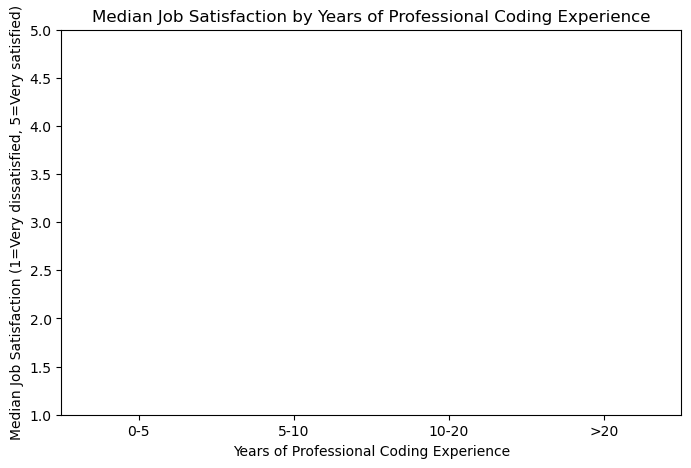

In [16]:
#Visualize the relationship

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=median_satisfaction, x='ExperienceRange', y='JobSat_num')

plt.title('Median Job Satisfaction by Years of Professional Coding Experience')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Median Job Satisfaction (1=Very dissatisfied, 5=Very satisfied)')
plt.ylim(1,5)
plt.show()

In [ ]:
Step 5: Visualize Job Satisfaction
Use a count plot to show the distribution of JobSat values. This provides insights into the overall satisfaction levels of respondents.

In [ ]:
Step 5: Visualize Job Satisfaction
Use a count plot to show the distribution of JobSat values. This provides insights into the overall satisfaction levels of respondents.

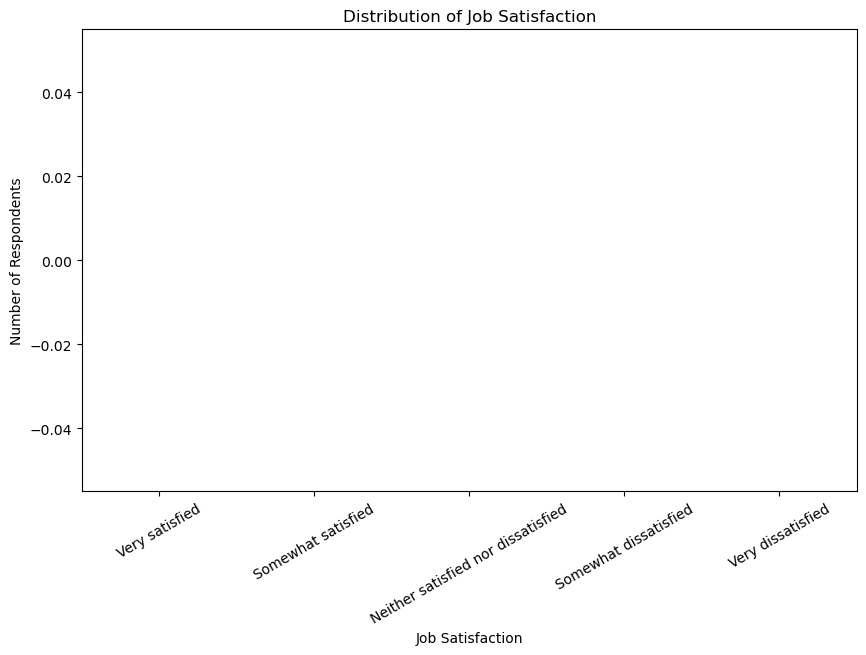

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='JobSat', order=[
    'Very satisfied', 
    'Somewhat satisfied', 
    'Neither satisfied nor dissatisfied', 
    'Somewhat dissatisfied', 
    'Very dissatisfied'
])

plt.title('Distribution of Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.show()


In [ ]:
Step 6: Analyzing Remote Work Preferences by Job Role
Analyze trends in remote work based on job roles. Use the RemoteWork and Employment columns to explore preferences and examine if specific job roles prefer remote work more than others.

Use a count plot to show remote work distribution.

Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.

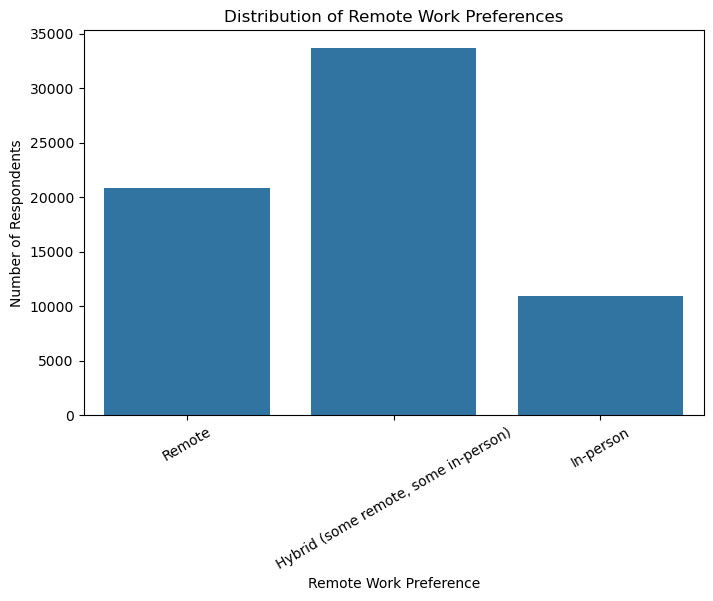

In [19]:
# Count plot of RemoteWork distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='RemoteWork')

plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=30)
plt.show()


In [20]:
# Cross-tabulate RemoteWork by Employment
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'], margins=True)
print(remote_by_employment)


RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time                                                                   494   
Student, part-time;Employed, part-time                                          

In [21]:
#Cross-tabulate RemoteWork by Employment and Job Role
# If DevType contains multiple job roles per respondent separated by semicolons,
# first explode it to analyze each role separately:

df_roles = df.dropna(subset=['DevType', 'RemoteWork', 'Employment']).copy()

# Split DevType by semicolon and explode
df_roles['DevType'] = df_roles['DevType'].str.split(';')
df_roles = df_roles.explode('DevType')

# Cross-tab of RemoteWork by Employment and Job Role
remote_role_employment = pd.crosstab(
    [df_roles['Employment'], df_roles['DevType']],
    df_roles['RemoteWork'],
    normalize='index'  # to get proportions by Employment & Role
)

print(remote_role_employment.head(20))


RemoteWork                                                         Hybrid (some remote, some in-person)  \
Employment          DevType                                                                               
Employed, full-time Academic researcher                                                        0.562500   
                    Blockchain                                                                 0.175258   
                    Cloud infrastructure engineer                                              0.460251   
                    Data engineer                                                              0.513740   
                    Data or business analyst                                                   0.507123   
                    Data scientist or machine learning specialist                              0.547518   
                    Database administrator                                                     0.368421   
                    Designer         

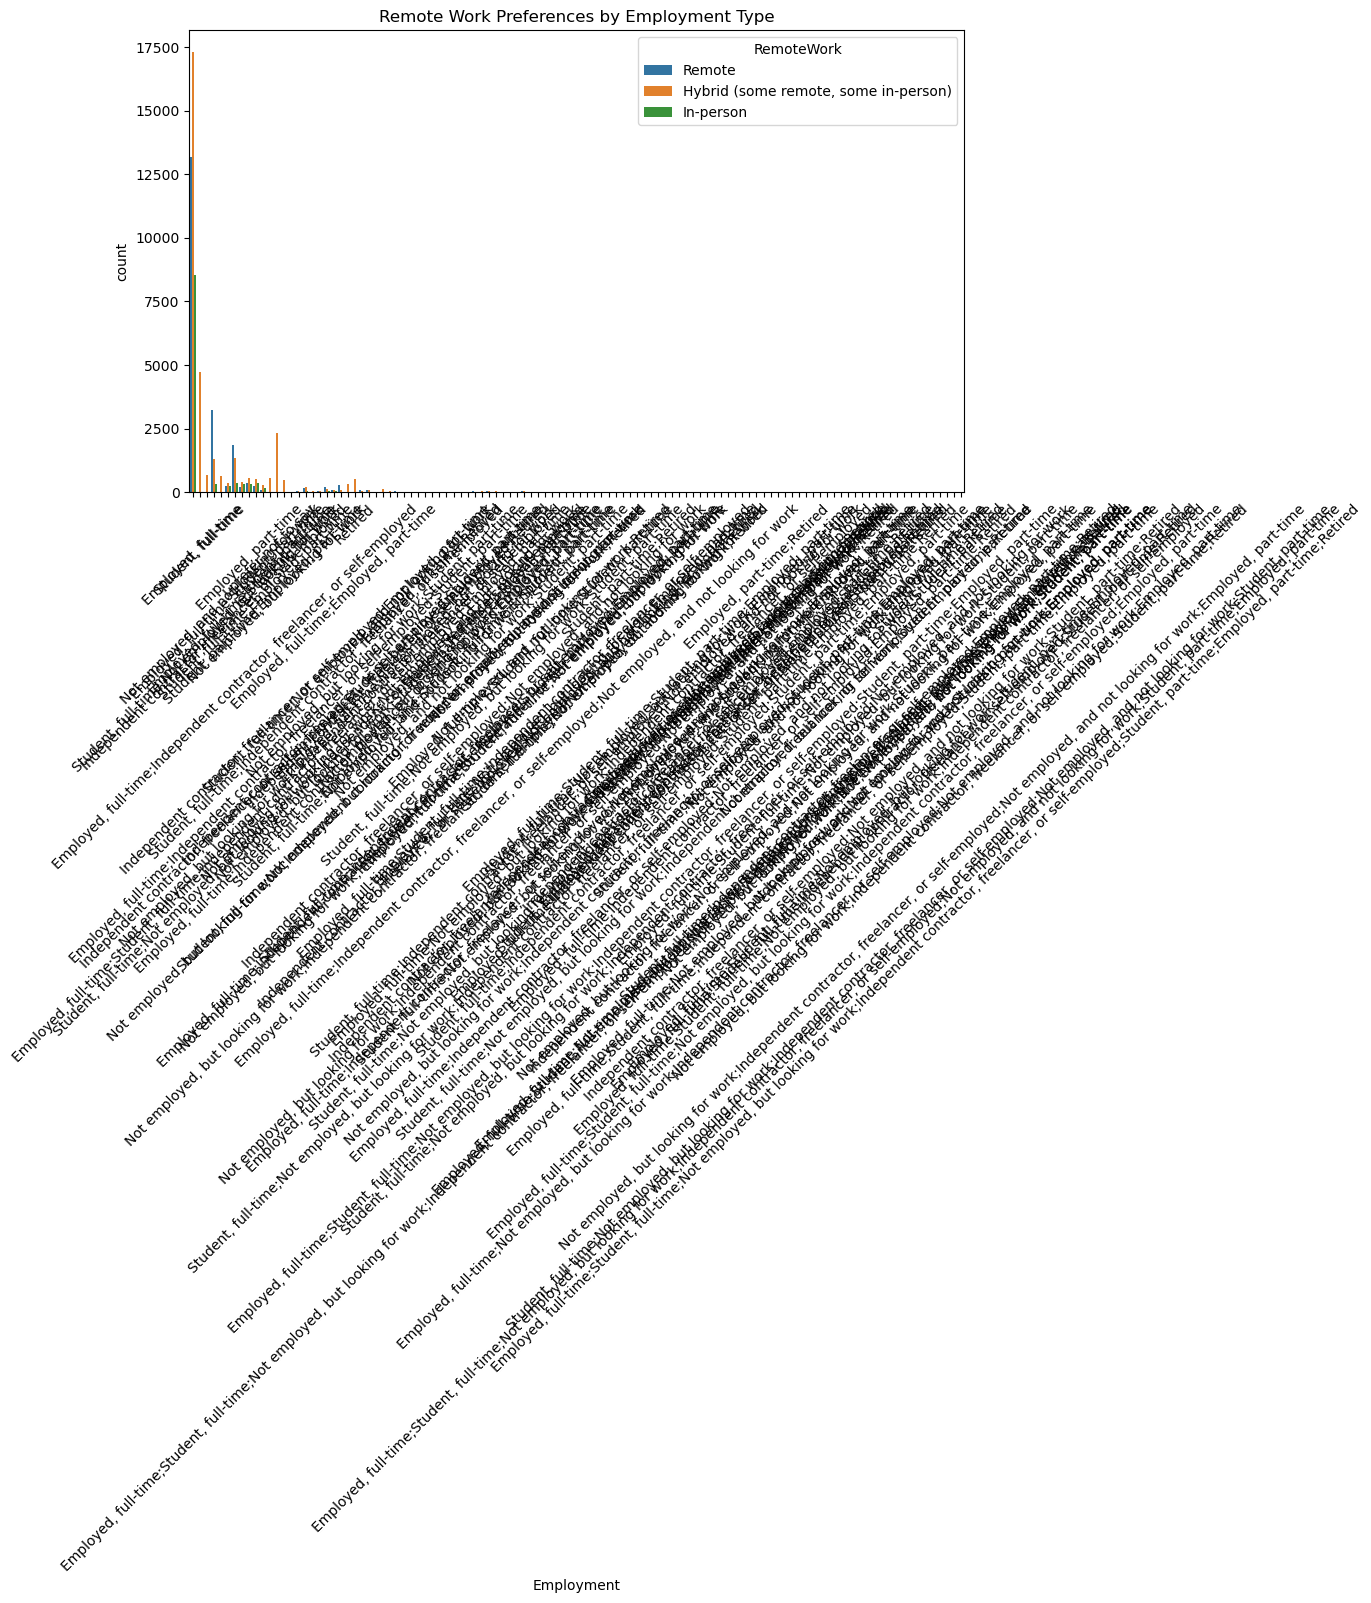

In [22]:
# Visualize Remote Work preference by Employment or Job Role
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Employment', hue='RemoteWork')
plt.title('Remote Work Preferences by Employment Type')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Step 7: Analyzing Programming Language Trends by Region






Analyze the popularity of programming languages by region. Use the LanguageHaveWorkedWith column to investigate which languages are most used in different regions.

Filter data by country or region.

Visualize the top programming languages by region with a bar plot or heatmap.

In [23]:
#Preprocess Language Data
#Drop missing values
df_lang = df.dropna(subset=['Country', 'LanguageHaveWorkedWith']).copy()

# Split the LanguageHaveWorkedWith column and explode
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.split(';')
df_lang = df_lang.explode('LanguageHaveWorkedWith')

# Optional: trim whitespace
df_lang['LanguageHaveWorkedWith'] = df_lang['LanguageHaveWorkedWith'].str.strip()

In [24]:
#Filter by Region (Country Example)
#Let’s start by analyzing for a single country: India

country = 'India'
df_country = df_lang[df_lang['Country'] == country]

# Count top 10 languages
top_languages = df_country['LanguageHaveWorkedWith'].value_counts().head(10)
print(top_languages)

LanguageHaveWorkedWith
JavaScript                 2730
HTML/CSS                   2322
Python                     2128
SQL                        1986
Java                       1549
TypeScript                 1405
C++                        1127
C                          1084
Bash/Shell (all shells)     759
PHP                         722
Name: count, dtype: int64


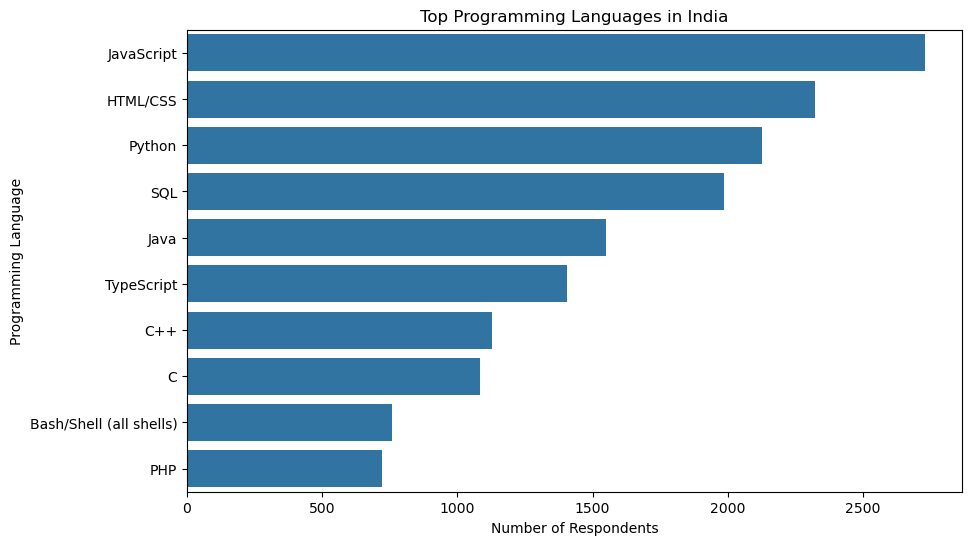

In [27]:
#Bar Plot of Top Languages
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(x=top_languages.values, y=top_languages.index)

plt.title(f'Top Programming Languages in {country}')
plt.xlabel('Number of Respondents')
plt.ylabel('Programming Language')
plt.show()


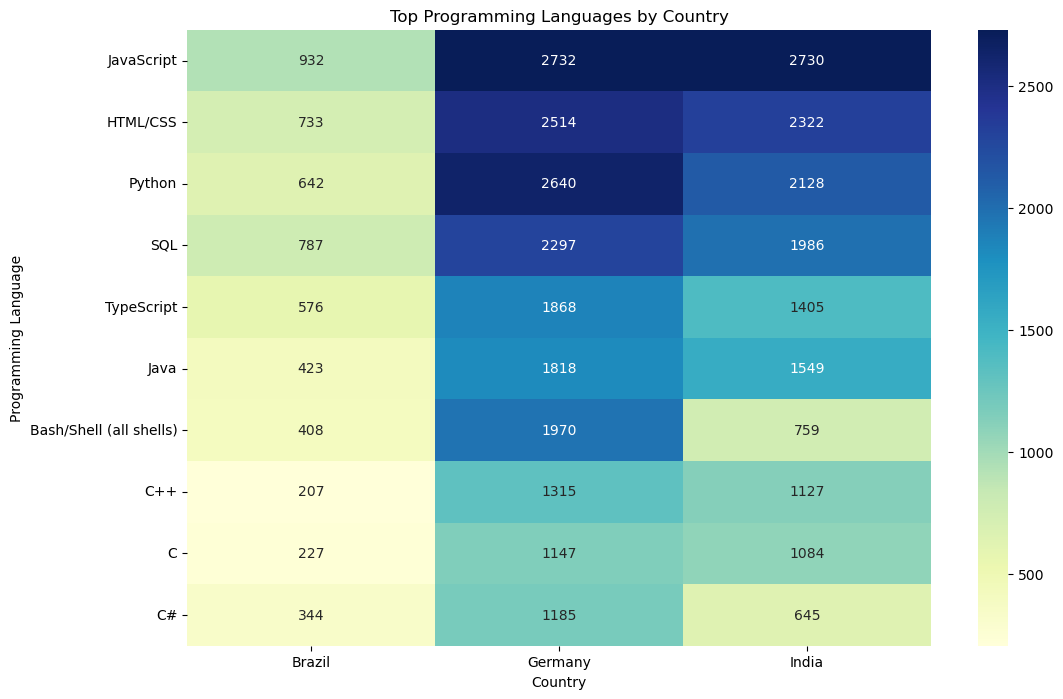

In [26]:
#Heatmap Comparing Multiple Countries

# Select countries
selected_countries = ['India', 'United States', 'Germany', 'Brazil', 'United Kingdom']
df_selected = df_lang[df_lang['Country'].isin(selected_countries)]

# Create a pivot table of languages vs countries
pivot = pd.crosstab(df_selected['LanguageHaveWorkedWith'], df_selected['Country'])

# Focus on top 10 languages globally
top_10_langs = pivot.sum(axis=1).sort_values(ascending=False).head(10).index
pivot_top = pivot.loc[top_10_langs]

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(pivot_top, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Top Programming Languages by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.show()

In [ ]:
Step 8: Correlation Between Experience and Satisfaction
Examine how years of experience (YearsCodePro) correlate with job satisfaction (JobSatPoints_1). Use a scatter plot to visualize this relationship.

In [28]:
#Clean YearsCodePro
def convert_experience(x):
    if pd.isnull(x):
        return None
    if x == 'Less than 1 year':
        return 0.5
    if x == 'More than 50 years':
        return 51
    try:
        return float(x)
    except:
        return None

df['YearsCodePro_num'] = df['YearsCodePro'].apply(convert_experience)


In [29]:
#Ensure JobSatPoints_1 is numeric
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')


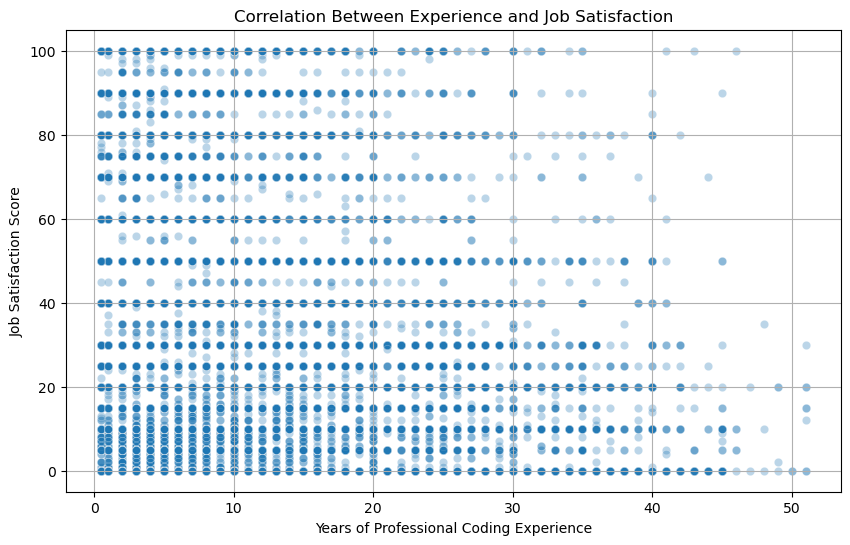

In [30]:
# Scatter Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Drop missing values in both columns
df_plot = df.dropna(subset=['YearsCodePro_num', 'JobSatPoints_1'])

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_plot, x='YearsCodePro_num', y='JobSatPoints_1', alpha=0.3)

plt.title('Correlation Between Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.grid(True)
plt.show()


In [31]:
#Correlation Coefficient 
correlation = df_plot[['YearsCodePro_num', 'JobSatPoints_1']].corr().iloc[0,1]
print(f'Correlation coefficient: {correlation:.2f}')



Correlation coefficient: -0.03


In [ ]:
Step 9: Educational Background and Employment Type
Explore how educational background (EdLevel) relates to employment type (Employment). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.



In [32]:
#Clean Relevant Columns Ensure no missing values:
df_clean = df.dropna(subset=['EdLevel', 'Employment'])

In [33]:

 #Cross-tabulation of EdLevel vs Employment
# Frequency table
education_employment_ct = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'])
print(education_employment_ct.head())


Employment                                       Employed, full-time  \
EdLevel                                                                
Associate degree (A.A., A.S., etc.)                             1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                   16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                11011   
Primary/elementary school                                        160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                  2073   

Employment                                       Employed, full-time;Employed, part-time  \
EdLevel                                                                                    
Associate degree (A.A., A.S., etc.)                                                    9   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          90   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       61   
Primary/elementary school          

In [34]:
#Normalize to Get Proportions
# Proportions by education level
education_employment_prop = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'], normalize='index')
print(education_employment_prop.head())


Employment                                       Employed, full-time  \
EdLevel                                                                
Associate degree (A.A., A.S., etc.)                         0.590630   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                0.673803   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)             0.707784   
Primary/elementary school                                   0.139616   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)              0.697980   

Employment                                       Employed, full-time;Employed, part-time  \
EdLevel                                                                                    
Associate degree (A.A., A.S., etc.)                                             0.005020   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                    0.003608   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                 0.003921   
Primary/elementary school          

<Figure size 1200x600 with 0 Axes>

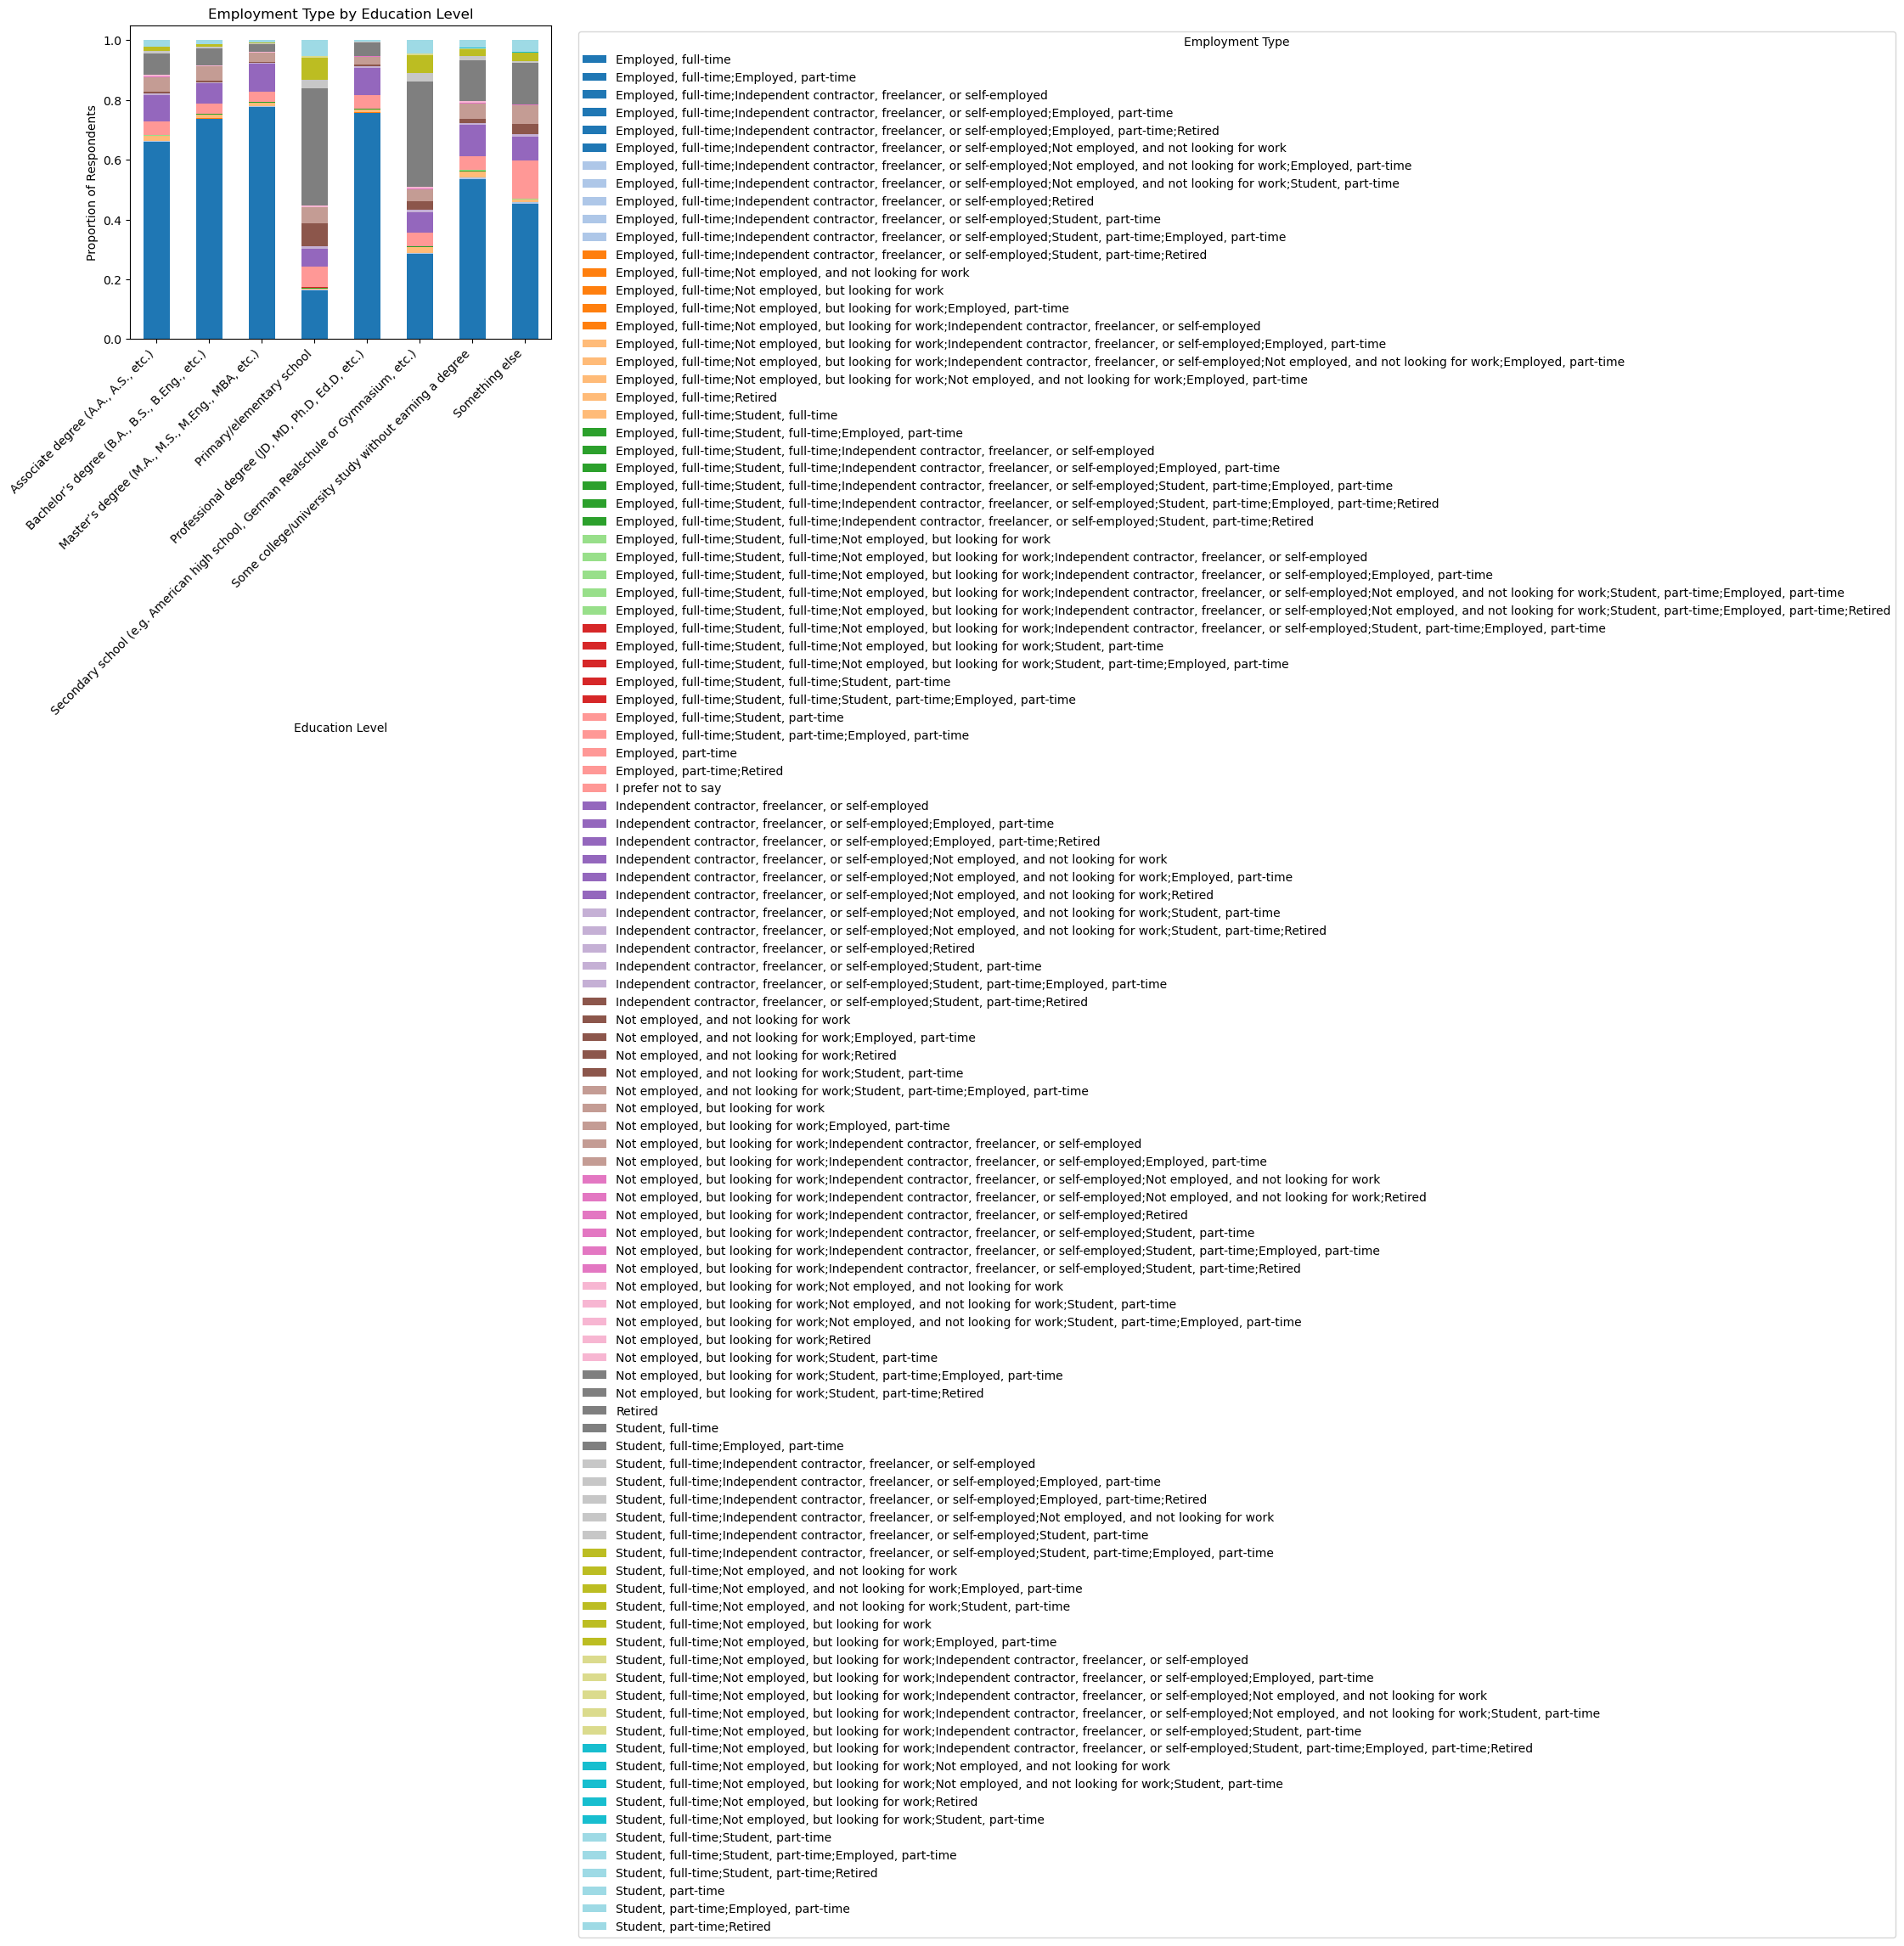

In [36]:
#Visualization: Stacked Bar Chart
# Plot a normalized stacked bar chart
#Let’s show how employment types vary across education levels:
plt.figure(figsize=(12,6), constrained_layout=True)
education_employment_prop.plot(kind='bar', stacked=True, colormap='tab20')
plt.title('Employment Type by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion of Respondents')
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.show()



In [ ]:
Step 10: Save the Cleaned and Analyzed Dataset

In [37]:
# Define the path and filename
save_path = r"C:\Users\nguif\Desktop\N Power\Capstone Project\Capstone Project\lab 12.csv"

# Save the DataFrame (e.g., your cleaned df)
df.to_csv(save_path, index=False)

print(f"Dataset successfully saved as:\n{save_path}")


Dataset successfully saved as:
C:\Users\nguif\Desktop\N Power\Capstone Project\Capstone Project\lab 12.csv
